In [15]:
import pandas as pd
df = pd.read_csv("mlchallenge_set_2021.tsv", sep="\t",header=None, names=['category','primary_image_url','all_image_urls','attributes','index'])

In [16]:
df.head()

,category,primary_image_url,all_image_urls,attributes,index
0,2,https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/iYYA...,https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/iYYA...,"(Brand:Shimano,US Shoe Size (Men's):4.5,Modifi...",0
1,2,https://i.ebayimg.com/00/s/MTA1OFgxMTM0/z/KPIA...,https://i.ebayimg.com/00/s/MTA1OFgxMTM0/z/KPIA...,"(Color:Gray/White,Country/Region of Manufactur...",1
2,2,https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/flIA...,https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/flIA...,"(Style:Cleats,Color:White Orange,US Shoe Size ...",2
3,2,http://i.ebayimg.com/00/s/ODAwWDEwNjc=/z/XHcAA...,http://i.ebayimg.com/00/s/ODAwWDEwNjc=/z/XHcAA...,"(Width:Medium (D, M),US Size:9,Brand:VANS,Colo...",3
4,2,https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/scsA...,https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/scsA...,"(US Shoe Size (Men's):10.5,Material:Enter item...",4


In [79]:
import requests

# download images
for i in range(len(df['primary_image_url'][:21])):
    url = df['primary_image_url'][i]
    r = requests.get(url)
    with open("test/test{}.jpg".format(i), "wb") as f:
        f.write(r.content)

In [67]:
import os
import numpy as np
from tqdm import tqdm
from glob import glob
from PIL import Image

In [86]:
# dir='test/'
# def convert(dir,width,height):
#     file_list=os.listdir(dir)
#     for filename in file_list:
#         path=''
#         path=dir+filename
#         im=Image.open(path)
#         (x, y)= im.size
#         x_s = width
#         y_s = int(y * x_s / x)
#         out = im.resize((x_s, y_s), Image.LANCZOS)
#         print("{} resized".format(filename))
#         out.save(path)

In [80]:
img_size = 256  #根据实际情况可修改
test_path = 'test'  #根据自己的目录修改
nub_test = len(glob(test_path + '/*.jpg'))

#先生成空array，然后往里填每张图片的array
X_train = np.zeros((nub_test,img_size,img_size,3),dtype=np.uint8) 
y_train = np.zeros((nub_test),dtype=np.uint8)

i = 0
for img_path in tqdm(glob(test_path + '/*.jpg')):

    img = Image.open(img_path)
    img = img.resize((img_size,img_size),Image.LANCZOS) #图片resize
    arr = np.asarray(img)  #图片转array
    X_train[i, :, :, :] = arr #赋值
    
    i += 1

100%|██████████| 21/21 [00:00<00:00, 112.23it/s]


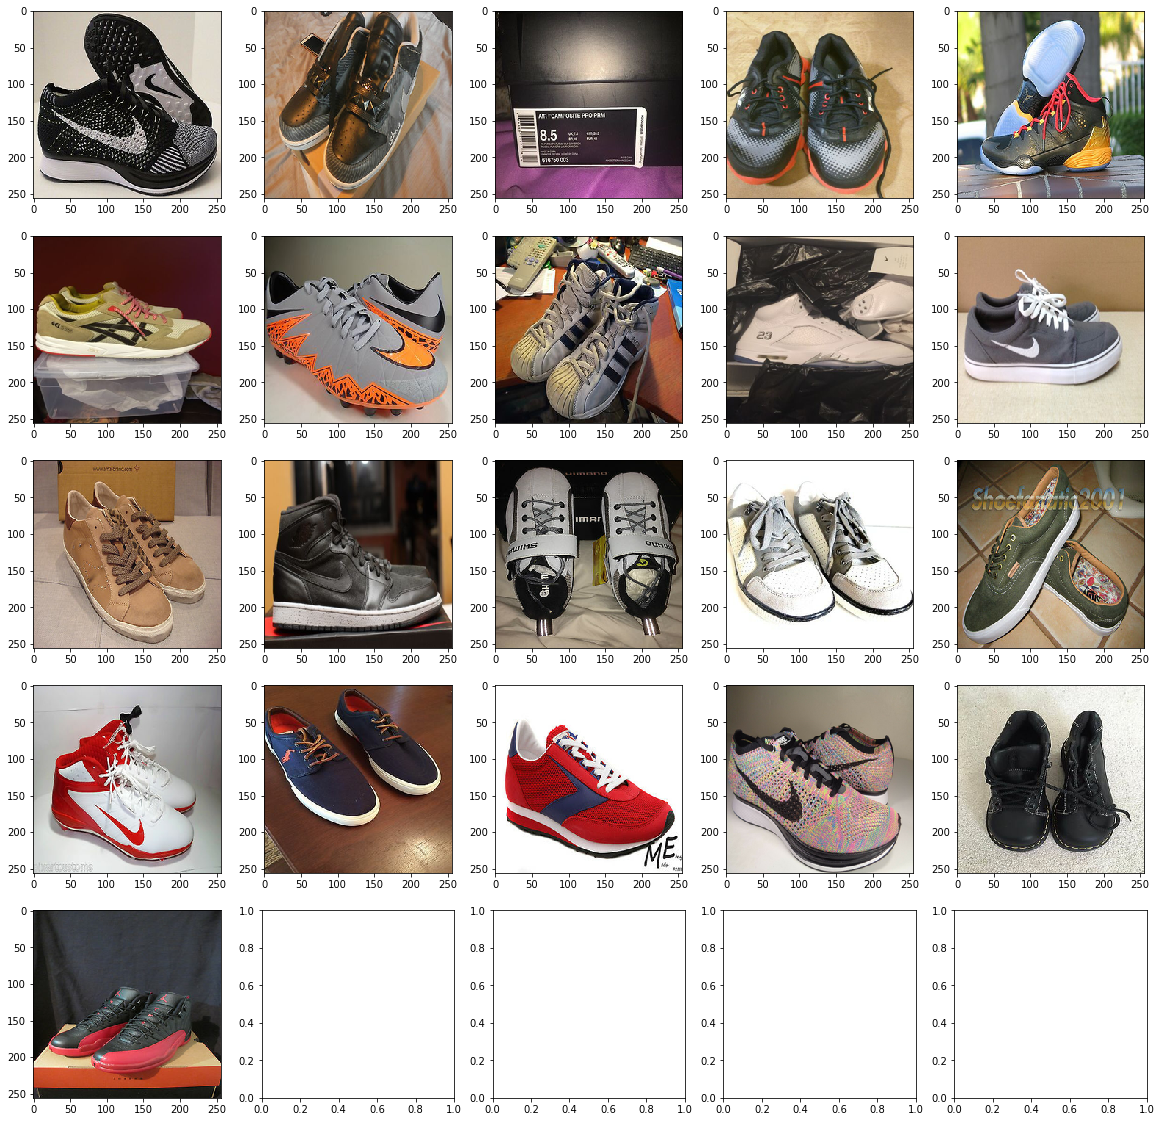

In [85]:
fig,axes = plt.subplots(5,5,figsize=(20, 20))

j = 0
for i,img in enumerate(X_train[:21]):
    axes[i//5,j%5].imshow(img)
    j+=1

In [90]:
import cv2
import matplotlib.pyplot as plt                        
%matplotlib inline

img_size = 256  #tbd
test_path = 'test'  #根据自己的目录修改
nub_test = len(glob(test_path + '/*.jpg'))

#先生成空array，然后往里填每张图片的array
X_train = np.zeros((nub_test,img_size,img_size,3),dtype=np.uint8) 
y_train = np.zeros((nub_test),dtype=np.uint8)

i = 0
for img_path in tqdm(glob(test_path + '/*.jpg')):

    img = cv2.imread(img_path) #img:array
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA) #图片resize
    X_train[i, :, :, :] = img #赋值
    
    i += 1

100%|██████████| 21/21 [00:00<00:00, 129.30it/s]


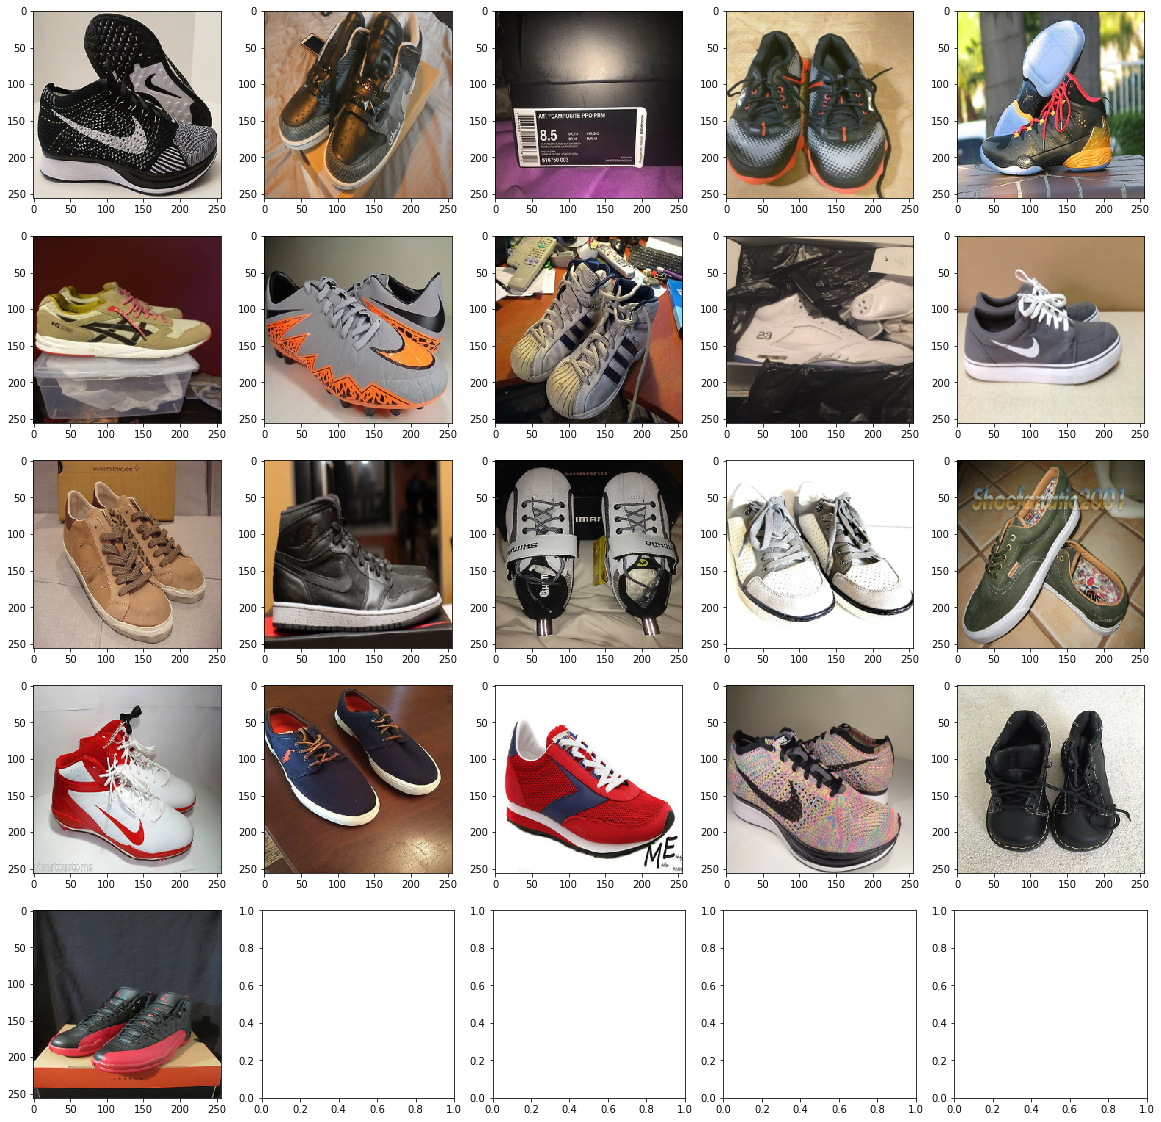

In [91]:
fig,axes = plt.subplots(5,5,figsize=(20, 20))

j = 0
for i,img in enumerate(X_train[:21]):
    axes[i//5,j%5].imshow(img)
    j+=1